In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, y):
  return x**2 +2*x*y +1

eps = 1e-6
dx = (f(1 + eps, 2) -f(1, 2))/eps
dy = (f(1,2 + eps)-f(1, 2))/eps
dx, dy

(6.0000009991512115, 2.000000000279556)

In [3]:
# 후진 자동 미분
x = torch.tensor(1. , requires_grad=True) # 실수만 입력
y = torch.tensor(2. , requires_grad=True)

v = f(x, y) # feed forward
v.backward() # back prob
x.grad, y.grad

(tensor(6.), tensor(2.))

In [4]:
x.grad = None #다시 실행시 초기화해야 같은 값이 나옴
y.grad = None
v = f(x, y)
v.backward()
x.grad, y.grad

(tensor(6.), tensor(2.))

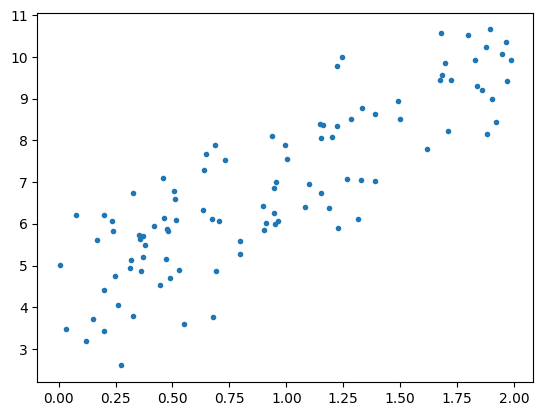

In [5]:
m=100
x = np.random.rand(m, 1)* 2
y = 3*x + 4 + np.random.randn(m, 1)
plt.plot(x, y, '.')

In [6]:
a =torch.randn(1,  requires_grad=True)
b = torch.randn(1)
b.requires_grad = True
a, b
eta = 0.01

xt = torch.tensor(x, dtype = torch.float32)
yt = torch.tensor(y).float()


In [7]:

for step in range(5000):
  # 1.feed-forward
  pred = a*xt +b
  # 2.loss 계산
  mse = torch.mean((pred -yt)**2)
  # 3.graient 계산
  a.grad = None
  b.grad = None
  mse.backward()
  # 4. update
  a.data= a - eta * a.grad
  b.data = b - eta *b.grad
  print(mse)

tensor(34.4658, grad_fn=<MeanBackward0>)
tensor(31.8133, grad_fn=<MeanBackward0>)
tensor(29.3725, grad_fn=<MeanBackward0>)
tensor(27.1264, grad_fn=<MeanBackward0>)
tensor(25.0595, grad_fn=<MeanBackward0>)
tensor(23.1574, grad_fn=<MeanBackward0>)
tensor(21.4070, grad_fn=<MeanBackward0>)
tensor(19.7962, grad_fn=<MeanBackward0>)
tensor(18.3139, grad_fn=<MeanBackward0>)
tensor(16.9498, grad_fn=<MeanBackward0>)
tensor(15.6944, grad_fn=<MeanBackward0>)
tensor(14.5392, grad_fn=<MeanBackward0>)
tensor(13.4761, grad_fn=<MeanBackward0>)
tensor(12.4977, grad_fn=<MeanBackward0>)
tensor(11.5973, grad_fn=<MeanBackward0>)
tensor(10.7686, grad_fn=<MeanBackward0>)
tensor(10.0060, grad_fn=<MeanBackward0>)
tensor(9.3042, grad_fn=<MeanBackward0>)
tensor(8.6583, grad_fn=<MeanBackward0>)
tensor(8.0638, grad_fn=<MeanBackward0>)
tensor(7.5167, grad_fn=<MeanBackward0>)
tensor(7.0132, grad_fn=<MeanBackward0>)
tensor(6.5498, grad_fn=<MeanBackward0>)
tensor(6.1232, grad_fn=<MeanBackward0>)
tensor(5.7306, grad_fn=

In [8]:
x_new = torch.tensor([[0],[2]])
a*x_new +b

tensor([[4.2017],
        [9.9550]], grad_fn=<AddBackward0>)

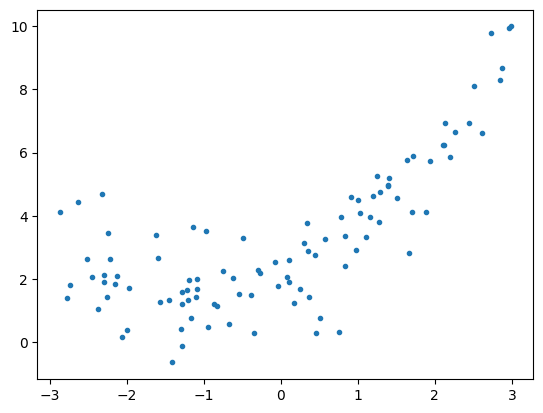

In [9]:
m=100
x_train = torch.rand(m, 1) *6 -3
y_train = 0.5 * x_train **2 + x_train +2 + torch.randn(m, 1)
x_valid = torch.rand(m, 1) *6 -3
y_valid = 0.5 * x_valid ** 2 + x_valid + 2 + torch.randn(m, 1)

plt.plot(x_train, y_train, '.')


In [10]:
a = torch.randn(1, requires_grad= True)
b = torch.randn(1, requires_grad=True)

def model(x):  # model = torch.nn.Linear(1(입력값),1(출력값)) 한번에 함수를 만듬
  return a*x + b
opt = torch.optim.Adam([a, b]) # opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss() # loss_fn= torch.mean((pred - y_train)**2)
pred= model(x_train)
loss_fn(pred, y_train)



tensor(24.8019, grad_fn=<MseLossBackward0>)

In [11]:
for step in range(5000):
  # 1. feed-forward
  pred = model(x_train)
  # 2. loss
  loss = loss_fn(pred, y_train) # loss_fn= torch.mean((pred - y_train)**2)
  # 3. grad
  opt.zero_grad()  #a.grad = None #b.grad = None 초기화
  loss.backward()
  # 4. update
  opt.step()
  print(f'step = {step}   loss = {loss.item()}')

step = 0   loss = 24.801864624023438
step = 1   loss = 24.784317016601562
step = 2   loss = 24.766773223876953
step = 3   loss = 24.749238967895508
step = 4   loss = 24.731712341308594
step = 5   loss = 24.714191436767578
step = 6   loss = 24.696674346923828
step = 7   loss = 24.67917251586914
step = 8   loss = 24.66167640686035
step = 9   loss = 24.644189834594727
step = 10   loss = 24.6267032623291
step = 11   loss = 24.609237670898438
step = 12   loss = 24.591772079467773
step = 13   loss = 24.574316024780273
step = 14   loss = 24.556867599487305
step = 15   loss = 24.539430618286133
step = 16   loss = 24.522001266479492
step = 17   loss = 24.50458526611328
step = 18   loss = 24.487171173095703
step = 19   loss = 24.469770431518555
step = 20   loss = 24.452375411987305
step = 21   loss = 24.43499183654785
step = 22   loss = 24.417617797851562
step = 23   loss = 24.400249481201172
step = 24   loss = 24.382892608642578
step = 25   loss = 24.365550994873047
step = 26   loss = 24.348215

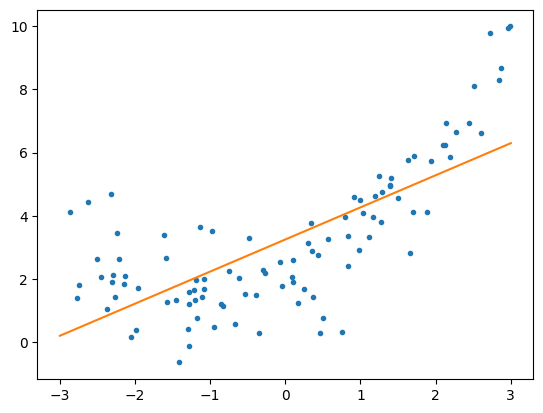

In [12]:
x_new = torch.linspace(-3, 3, 100).reshape(100, 1)
with torch.no_grad():
  y_new= model(x_new)
plt.plot(x_train, y_train, '.')
plt.plot(x_new, y_new, '-') #y_new.detach() 넘파이로 출력가능하게 해줌

In [13]:
pred = model(x_valid)
mse = loss_fn(pred, y_train) # loss_fn= torch.mean((pred - y_train)**2)
rmse = mse *0.5
mse, rmse

(tensor(7.6407, grad_fn=<MseLossBackward0>),
 tensor(3.8203, grad_fn=<MulBackward0>))

In [14]:
relu = torch.nn.ReLU()
relu(torch.tensor([-3, 0, 10]))

tensor([ 0,  0, 10])

In [15]:
'''def model(x):
  z = lin1(x)
  z = relu1(z)
  z = lin2(z)
  return z'''
''' model= torch.nn.Sequential(
  torch.nn.Linear(1,5)
  torch.nn.ReLU(),
  torch.nn.Linear(5,5)
  torch.nn.ReLu(),
  torch.nn.Linear(5,1)
)'''
lin1= torch.nn.Linear(1, 5) #(1(입력값),1(출력값)) 한번에 함수를 만듬
relu1 =torch.nn.ReLU()
lin2 = torch.nn.Linear(5,1)

model = torch.nn.Sequential(
    lin1, relu1, lin2
)
opt = torch.optim.Adam(model.parameters()) # opt = torch.optim.Adam(model.parameters())
loss_fn = torch.nn.MSELoss() # loss_fn= torch.mean((pred - y_train)**2)
pred= model(x_train)
loss_fn(pred, y_train)


tensor(15.2728, grad_fn=<MseLossBackward0>)

In [30]:
a = np.array([10,20,30,40,50,60])
indices = np.random.permutation(6) # 랜덤하게 인덱스값 추출
a[indices[:3]]

array([20, 40, 30])

In [43]:
train_len = len(x_train)
valid_len= len(x_valid)
total_sample_count=0
for epoch in range(100):
  step=1
  loss_list = []
  indices = torch.randperm(train_len)
  for i in range(0, train_len, 32):
    sample_i= indices[i:i+32]
    x_sample = x_train[sample_i]
    y_sample = y_train[sample_i]
    # 1. feed-forward
    pred = model(x_sample)
    # 2. loss
    loss = loss_fn(pred, y_sample) # loss_fn= torch.mean((pred - y_train)**2)
    # 3. grad
    opt.zero_grad()  #a.grad = None #b.grad = None 초기화
    loss.backward()
    # 4. update
    opt.step()
    step += 1
    loss_list.append(loss.item())
    total_sample_count += len(x_sample)
    print(f' \repoch = {epoch}  step = {step}   loss = {np.mean(loss_list)}', end='')
  print()

  step=1
  loss_list = []
  indices = torch.randperm(train_len)
  for i in range(0, valid_len, 32):
    sample_i= indices[i:i+32]
    x_sample = x_valid[sample_i]
    y_sample = y_valid[sample_i]
    # 1. feed-forward
    with torch.no_grad():
      pred = model(x_sample)
    # 2. loss
    loss = loss_fn(pred, y_sample) # loss_fn= torch.mean((pred - y_train)**2)

    step += 1
    loss_list.append(loss.item()  * len(x_sample))
    total_sample_count += len(x_sample)
    print(f' \r{" "*50}step = {step}   loss = {np.mean(loss_list)}', end='')
  print()

epoch = 0  step = 5   loss = 0.9016138091683388
                                                  step = 5   loss = 29.533486545085907
epoch = 1  step = 5   loss = 1.1739535331726074
                                                  step = 5   loss = 29.567626953125
epoch = 2  step = 5   loss = 0.8717049360275269
                                                  step = 5   loss = 29.579298973083496
epoch = 3  step = 5   loss = 0.8835552483797073
                                                  step = 5   loss = 29.595698475837708
epoch = 4  step = 5   loss = 1.0230973362922668
                                                  step = 5   loss = 29.599895358085632
epoch = 5  step = 5   loss = 0.8483437523245811
                                                  step = 5   loss = 29.625534415245056
epoch = 6  step = 5   loss = 0.9232739508152008
                                                  step = 5   loss = 29.62222658097744
epoch = 7  step = 5   loss = 0.9035761952400208
           

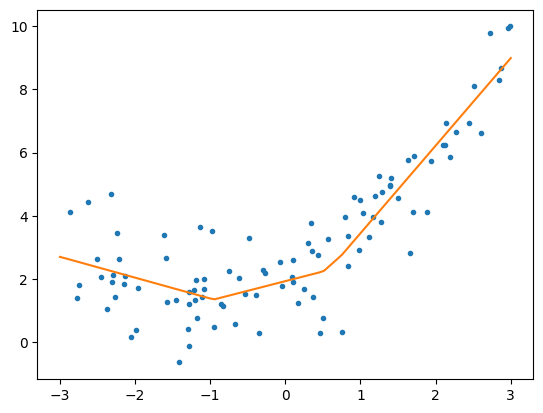

In [24]:
x_new = torch.linspace(-3, 3, 100).reshape(100, 1)
with torch.no_grad():
  y_new= model(x_new)
plt.plot(x_train, y_train, '.')
plt.plot(x_new, y_new, '-')

In [18]:
pred = model(x_valid)
mse = loss_fn(pred, y_train) # loss_fn= torch.mean((pred - y_train)**2)
rmse = mse *0.5
mse, rmse

(tensor(9.1723, grad_fn=<MseLossBackward0>),
 tensor(4.5862, grad_fn=<MulBackward0>))

##Linear 구체적 설명

In [19]:
lin = torch.nn.Linear(3,2) # 파라미터와 바이어스를 한꺼번에 만들어줌
dummy = torch.randn(5,3)


In [20]:
lin(dummy), lin.bias

(tensor([[ 0.1942,  0.0424],
         [ 0.2317,  0.3680],
         [ 0.3256, -0.4818],
         [ 0.6237, -0.0908],
         [ 0.5377,  0.2103]], grad_fn=<AddmmBackward0>),
 Parameter containing:
 tensor([0.4958, 0.2132], requires_grad=True))

In [21]:
dummy @ lin.weight.T + lin.bias

tensor([[ 0.1942,  0.0424],
        [ 0.2317,  0.3680],
        [ 0.3256, -0.4818],
        [ 0.6237, -0.0908],
        [ 0.5377,  0.2103]], grad_fn=<AddBackward0>)

In [22]:
a = torch.randn(3,2, requires_grad=True)
b = torch.randn(2, requires_grad= True)

def my_lin(x):  # model = torch.nn.Linear(3(입력값),2(출력값)) 한번에 함수를 만듬
  return x @ a + b

my_lin(dummy)

tensor([[ 2.2224, -2.2772],
        [ 2.1293, -2.2272],
        [-0.9221, -0.4076],
        [ 0.1484, -0.6409],
        [-0.7798, -0.3102]], grad_fn=<AddBackward0>)

array([30, 40, 50])